AMRUTHA KANAKATTE RAVISHANKAR;
    CWID :20027346

Q5. Load the “UCI_liver_cirrhosis.CSV” dataset, from the raw_data module in CANVAS, into Python (see the data dictionary at the bottom of this document). This is a dataset used for predicting “Liver problems” in patients.  Delete any rows with missing value. Discretize TB and TP into four quartiles (TB_quartiles and TP_quartiles).  Construct a CART model to classify “Liver Problems” (Selector) based only on the “Gender”,”Age_quartile, “A_G_Cat”, TB_quartiles and TP_quartiles.

In [1]:
#Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
#Load the dataset
df = pd.read_csv('UCI_liver_cirrhosis.csv')

In [3]:
#Drop the missing values
df.dropna(inplace=True)

In [4]:
# Discretize TB and TP and Age into quartiles
df['TB_quartiles'] = pd.qcut(df['TB'], q=4, labels=False)
df['TP_quartiles'] = pd.qcut(df['TP'], q=4, labels=False)
df['Age_quartiles'] = pd.qcut(df['Age'], q=4, labels=False)

In [5]:
# Encode categorical variables
le_gender = LabelEncoder()
le_ag_cat = LabelEncoder()

df['Gender'] = le_gender.fit_transform(df['Gender'])
df['A_G_Cat'] = le_ag_cat.fit_transform(df['A_G_Cat'])

In [6]:
# Features and target labels
features = ['Gender', 'Age_quartiles', 'A_G_Cat', 'TB_quartiles', 'TP_quartiles']
target = 'Selector'

X = df[features]
y = df[target]

In [7]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
# Initialize the CART model
cart_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=5)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [10]:
#Prediction
y_pred = cart_model.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.84      0.77       124
           2       0.31      0.18      0.23        50

    accuracy                           0.65       174
   macro avg       0.51      0.51      0.50       174
weighted avg       0.60      0.65      0.62       174

Accuracy Score:
0.6494252873563219
Confusion Matrix:
[[104  20]
 [ 41   9]]


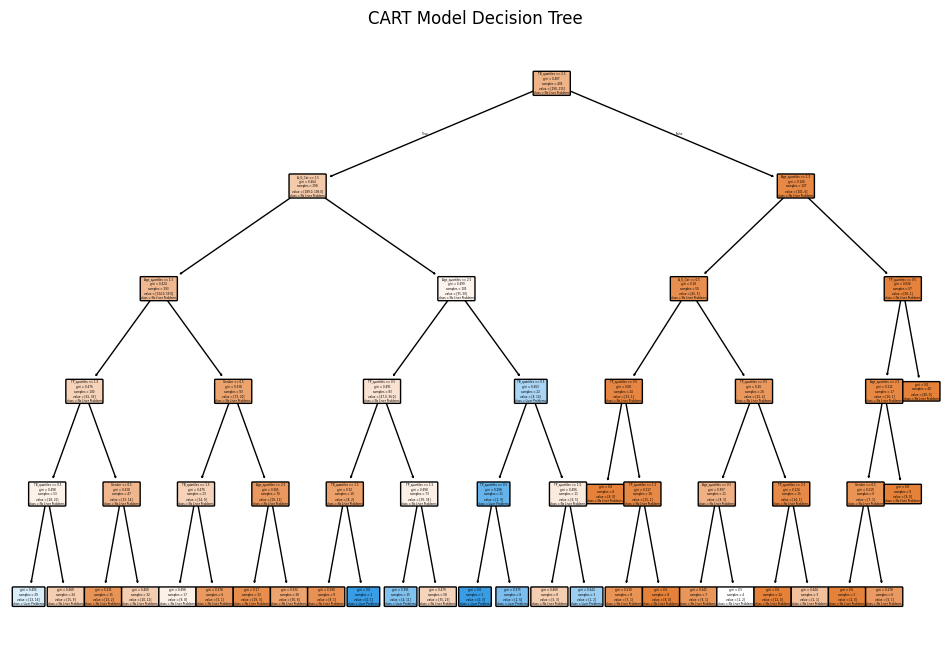

In [11]:
#Evaluation
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(cart_model, feature_names=features, class_names=["No Liver Problems", "Liver Problems"], filled=True, rounded=True)
plt.title("CART Model Decision Tree")
plt.show()